# Google Search Console Analytics for an Industrial equipment company
In this study, we embark on analyzing data sourced from the Google Search Console property of a Spanish industrial equipment firm specializing in overhead cranes and lifting gear. Spanning the past three months, the dataset comprises queries in Spanish, English, and French, reflecting the multilingual nature of the company's online presence.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and preprocessing the data
For this study we are going to be using data downloaded from the Google Search Console property of an industrial equipment company. The data covers the last 3 months (14-11-2023 / 14-02-2024).

The company analyzed is from Barcelona and works with overhead cranes and industrial lifting equipment. The main page is in Spanish but it is translated to English and French, so in the data there are queries in those three languages.

In [2]:
df_query = pd.read_csv('consultas.csv',low_memory = False)
df_date = pd.read_csv('Fechas.csv', low_memory = False)
df_country = pd.read_csv('Países.csv', low_memory = False)
df_pages = pd.read_csv('Páginas.csv', low_memory = False)

print(f'Search queries dataframe:\n{df_query.tail()}\n\n\n')
print(f'Date dataframe:\n{df_date.tail()}\n\n\n')
print(f'Countries dataframe:\n{df_country.tail()}\n\n\n')

Search queries dataframe:
      Consultas principales  Clics  Impresiones CTR  Posición
995       semi portal crane      0            2  0%      47.5
996  gantry crane and hoist      0            2  0%      48.5
997           carro portico      0            2  0%      49.0
998          crane security      0            2  0%      49.0
999      partes puente grua      0            2  0%      49.0



Date dataframe:
         Fecha  Clics  Impresiones    CTR  Posición
87  2023-11-18      5          496  1.01%     42.38
88  2023-11-17     18          713  2.52%     35.02
89  2023-11-16     18          842  2.14%     34.41
90  2023-11-15     14          787  1.78%     32.06
91  2023-11-14     20          782  2.56%     32.32



Countries dataframe:
                               País  Clics  Impresiones CTR  Posición
196                    Turkmenistán      0            1  0%      39.0
197                          Gambia      0            1  0%      70.0
198               Antigua y Barbuda  

#### Let's explain the dataframes of this datasets
When downloading data from Google Search Console, you get a .zip with the following files:
- 'Consultas.csv': An overview of the performance of all the queries the page has been found for.
- 'Dispositivos.csv': An overview of the performance of all device types the page has been found in.
- 'Fechas.csv': An overview of the performance of the page in every day during the 3 months.
- 'Páginas.csv': An overview of the performance of every page.
- 'Países.csv': An overview of the performance of the page in every country.

#### In each one of these datasets, there are 4 numeric columns that show the performance:
- Clics: The number of clics received.
- Impresiones: The number of times that the page has been shown.
- CTR: The Click-Through-Rate.
- Posición: The average position in the search results.

In [3]:
print(f'Column names:\n\n{df_query.columns}\n\n')
print(f'Column types:\n\n{df_query.dtypes}')

Column names:

Index(['Consultas principales', 'Clics', 'Impresiones', 'CTR', 'Posición'], dtype='object')


Column types:

Consultas principales     object
Clics                      int64
Impresiones                int64
CTR                       object
Posición                 float64
dtype: object


## Analyzing by word count and character count
#### Adding the character and word count for every query.

First of all, we are adding the string information we think of important when analyzing the queries. For example, we are going to add a column with the word count for each query and a column for the character count for every query.

Also, we are converting the CTR column to float from object type (20,5% --> 20.5).

In [4]:
df_query['CTR'] = df_query['CTR'].str.rstrip('%').astype(float)

# We add a new column with the character count for every query.
df_query['Character_Count'] = df_query['Consultas principales'].apply(lambda x: len(str(x)))

# We add a new column with the word count for every query.
df_query['Word_Count'] = df_query['Consultas principales'].apply(lambda x: len(str(x).split()))
print(df_query.tail())

      Consultas principales  Clics  Impresiones  CTR  Posición  \
995       semi portal crane      0            2  0.0      47.5   
996  gantry crane and hoist      0            2  0.0      48.5   
997           carro portico      0            2  0.0      49.0   
998          crane security      0            2  0.0      49.0   
999      partes puente grua      0            2  0.0      49.0   

     Character_Count  Word_Count  
995               17           3  
996               22           4  
997               13           2  
998               14           2  
999               18           3  


#### How does the word count act in the dataframe?
We're examining the distribution of word counts within our dataset to understand how queries are structured. The distribution appears to follow a normal pattern, with a peak around 3 words per query.

While our dataset contains queries with up to 11 words, we've chosen to focus our analysis on queries with 7 or fewer words. This decision was made due to the limited number of longer queries, which were insufficient for meaningful analysis.

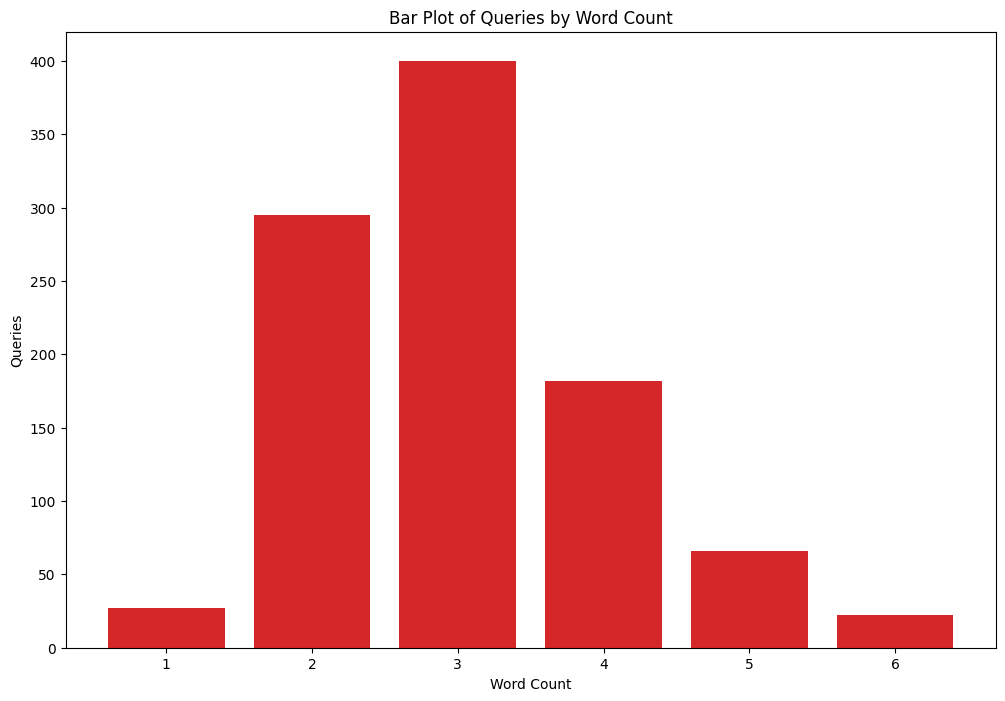

In [5]:
columns_to_plot = ['Clics', 'Impresiones', 'CTR', 'Posición']

plt.figure(figsize=(12,8))

for column in columns_to_plot:
    # We plot the query counts by Word Count, where Word Count is less than 7.
    df_word = df_query.groupby('Word_Count')[column].size().reset_index()
    df_word = df_word[df_word['Word_Count'] < 7]

    # Plot the bar chart
    plt.bar(x=df_word['Word_Count'], height=df_word[column], label=column)

plt.title('Bar Plot of Queries by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Queries')

plt.show()

#### Let's plot the mean value for every word count
We keep discarding all queries with more than 7 words due to their low presence in the dataframe. Now, we plot the mean for every unique value in Word_Count. 

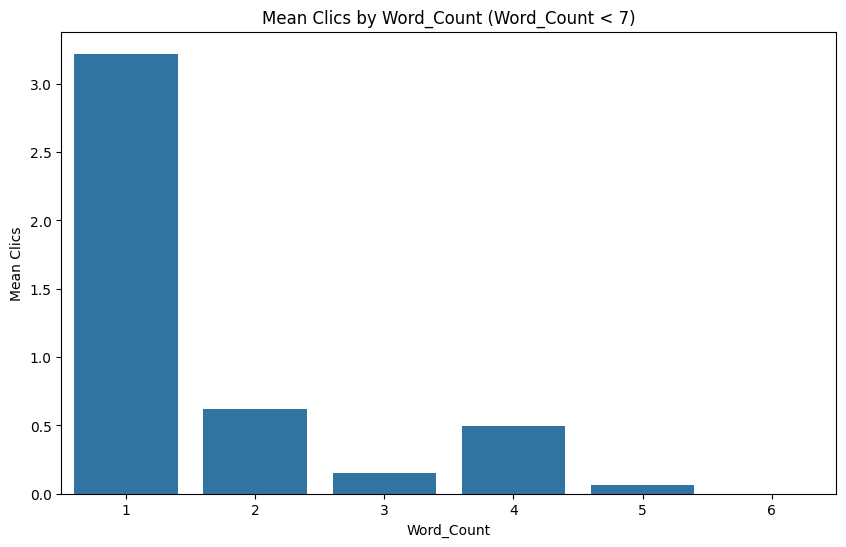

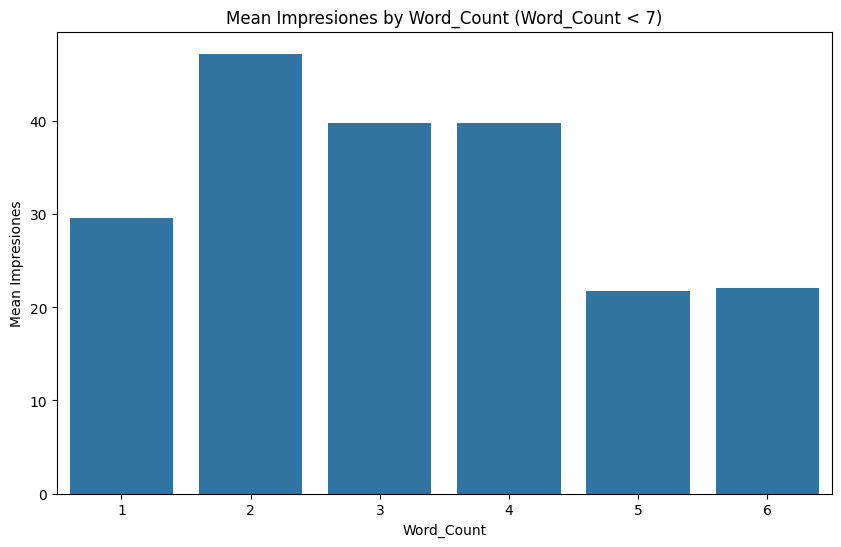

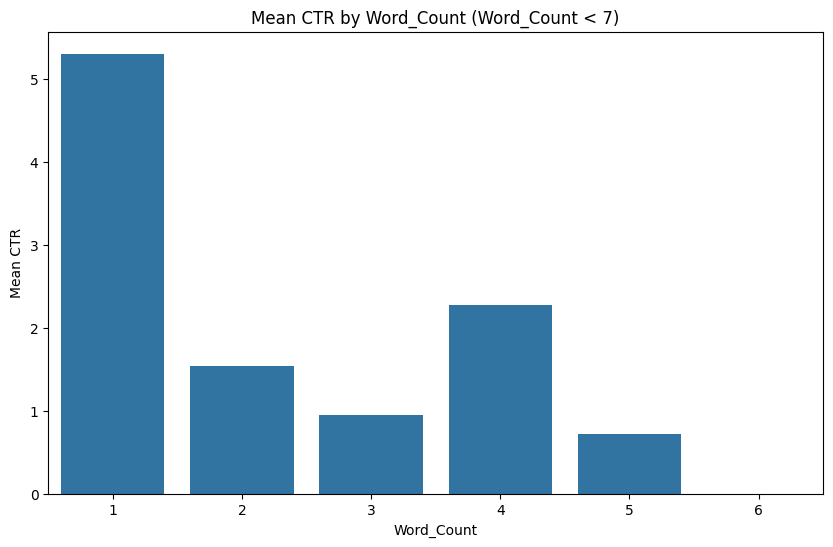

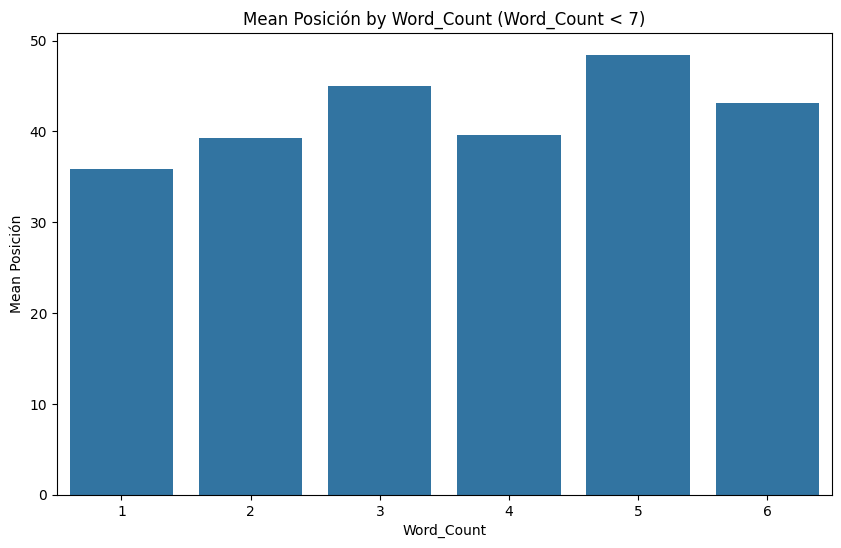

In [6]:
# Iterate over each column to plot
for column in columns_to_plot:
    # Calculate the mean value of the column grouped by Word_Count
    mean_values = df_query.groupby('Word_Count')[column].mean().reset_index()
    
    # Filter mean_values for Word_Count less than 7
    mean_values_filtered = mean_values[mean_values['Word_Count'] < 7]
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 6))
    
    # Plot bar plot for mean values
    sns.barplot(x='Word_Count', y=column, data=mean_values_filtered)
    
    # Set title and labels
    plt.title(f'Mean {column} by Word_Count (Word_Count < 7)')
    plt.xlabel('Word_Count')
    plt.ylabel(f'Mean {column}')
    
    # Show plot
    plt.show()

## Analyzing by country
#### Translate the countries to English with the Google Translate API.
We use the Google Translate API to translate the country names to English and plot more easily the world maps.

In [7]:
from googletrans import Translator

translator = Translator()

df_country['País'] = df_country['País'].apply(lambda x: translator.translate(x, src='es', dest='en').text)

#### World map plot for every feature.
We create a new dataframe with the following features:
- Exclude Spain
- Position = 100 - Position
- CTR (%) to float
- We ignore all countries with no clicks.

We plot a world map for every feature (Clicks, Impressions, CTR and Position).

C:\Users\usuario\AppData\Local\Temp\ipykernel_17632\786634265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_without_spain['CTR'] = df_country_without_spain['CTR'].str.replace('%', '').astype(float)


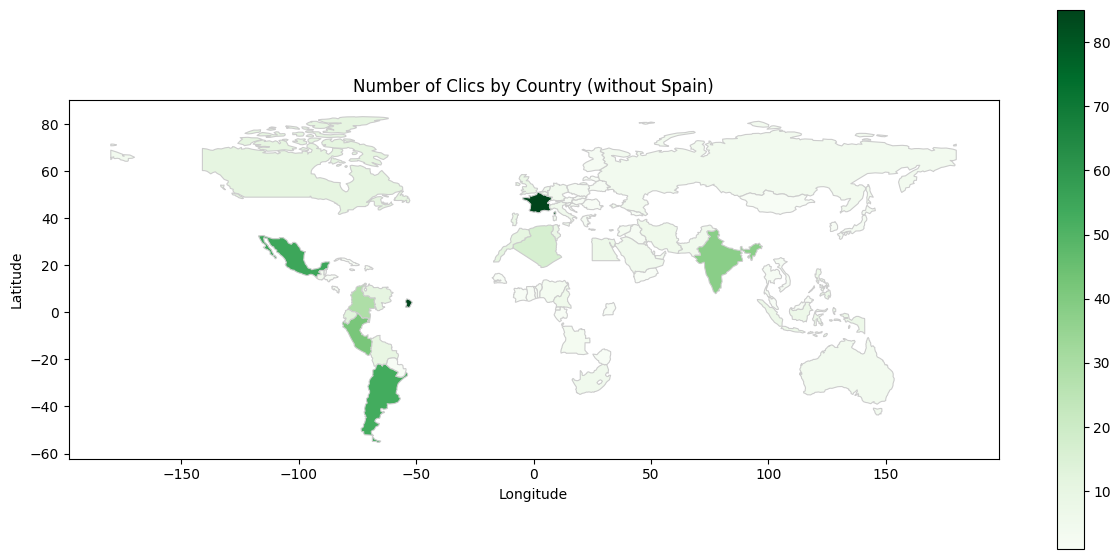

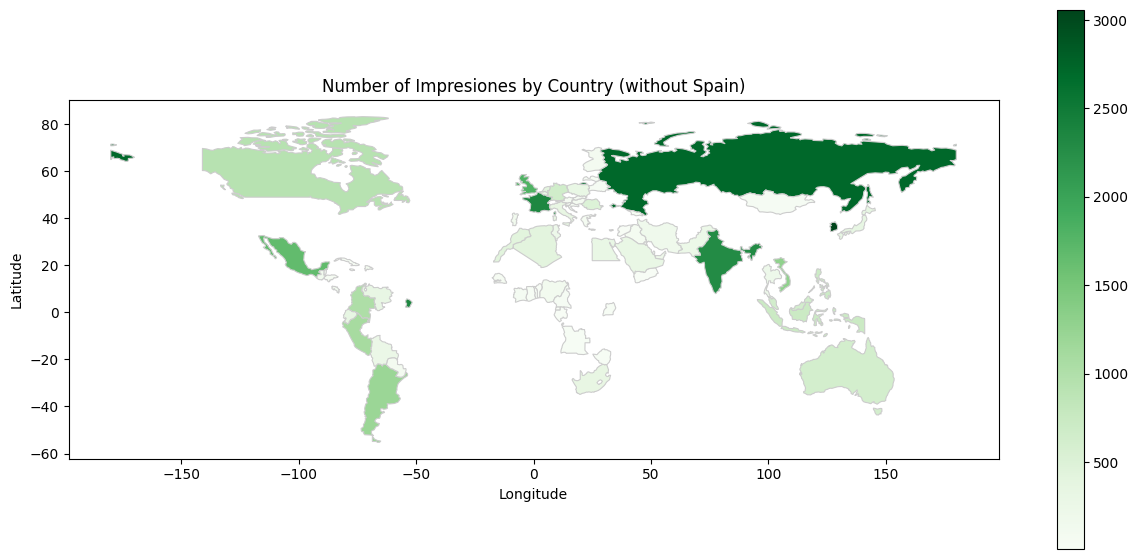

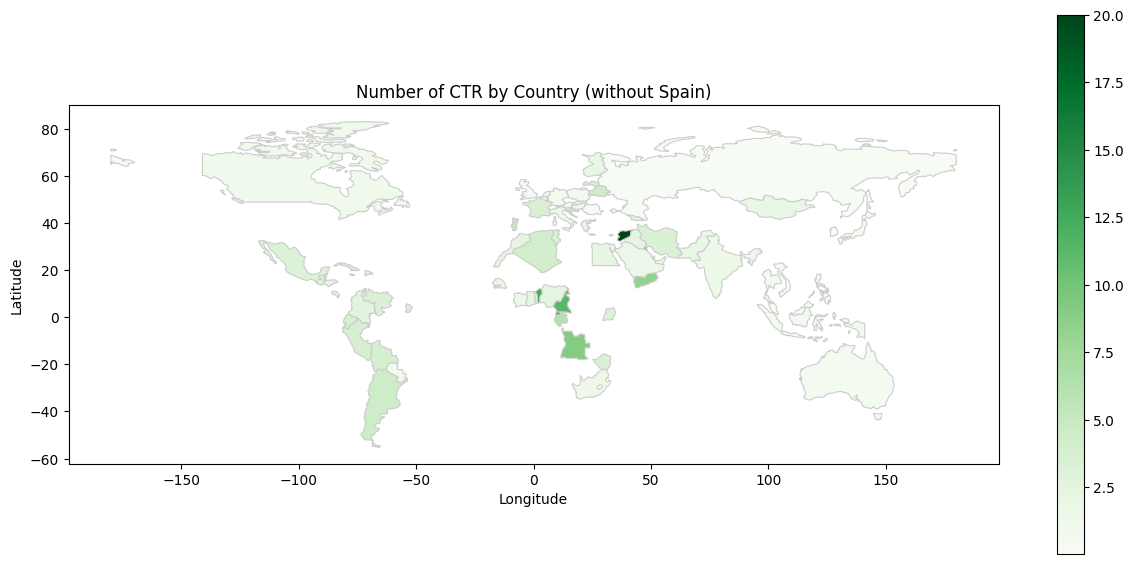

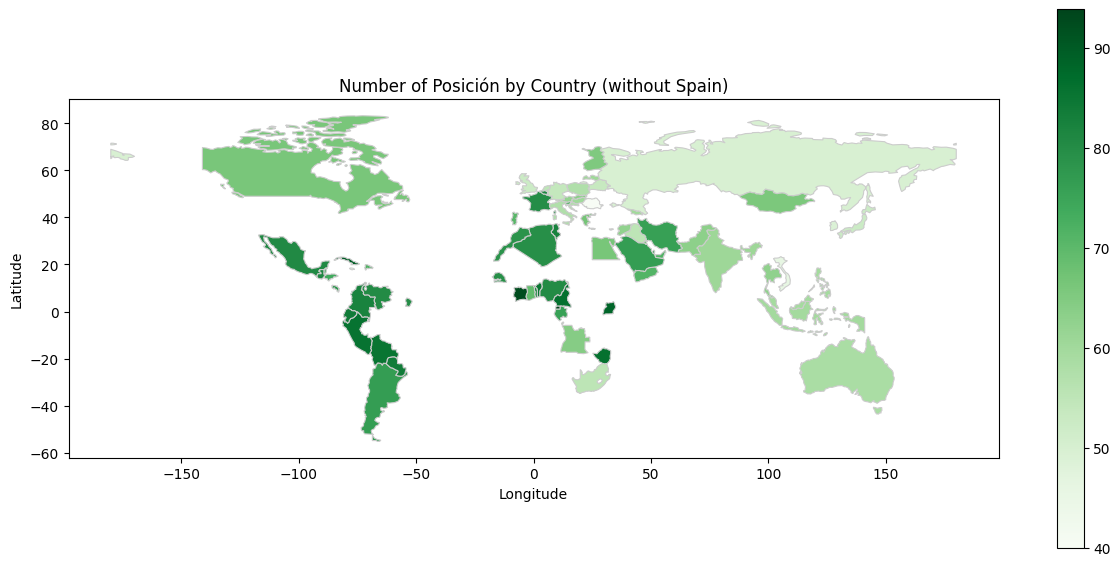

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

df_country_without_spain = df_country[df_country['País'] != 'Spain']
df_country_without_spain.loc[:, 'Posición'] = 100 - df_country_without_spain['Posición']
df_country_without_spain['CTR'] = df_country_without_spain['CTR'].str.replace('%', '').astype(float)
df_country_without_spain = df_country_without_spain[df_country_without_spain['Clics'] > 0]

# Load the world map data
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Merge the world map data with the df_country DataFrame on the 'name' column
world = world.merge(df_country_without_spain, how='left', left_on='NAME_EN', right_on='País')

# Plot the world map
for column in columns_to_plot:
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    world.plot(column=column, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Add title and axis labels
    plt.title(f'Number of {column} by Country (without Spain)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show plot
    plt.show()

## Analyzing by page language
#### We are going to analyze the SEO based on the languages we have (Spanish, English, French)
For this part of the analysis, we are going to be using the df_pages dataset, which covers information about the performance of every page in the website. To be able to use this dataset we have to look at the structure of the page. In this case, all pages in english start with *'https://domain.com/en/'*, pages in french start with *'https://domain.com/fr/'* and, the ones that do not specify the language are in spanish.

Keeping that in mind, we add a new column to the df called 'Lang' to specify the language of every page.

In [9]:
for index, page in df_pages['Páginas principales'].items():
    if '/en/' in page:
        df_pages.loc[index, 'Lang'] = 'EN'
    elif '/fr/' in page:
        df_pages.loc[index, 'Lang'] = 'FR'
    else:
        df_pages.loc[index, 'Lang'] = 'ES'

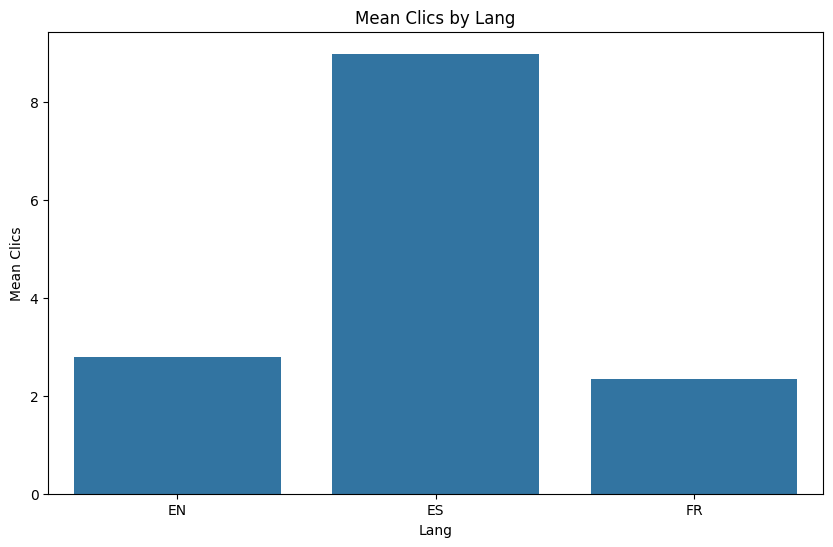

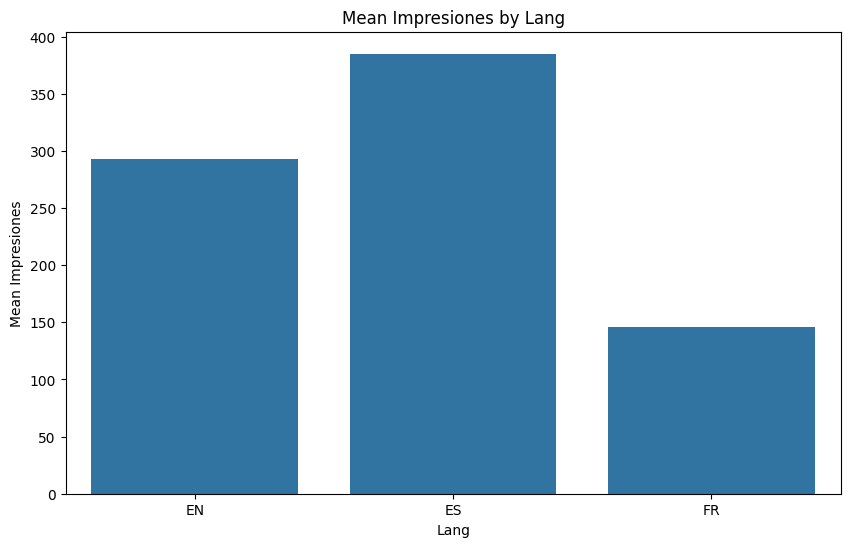

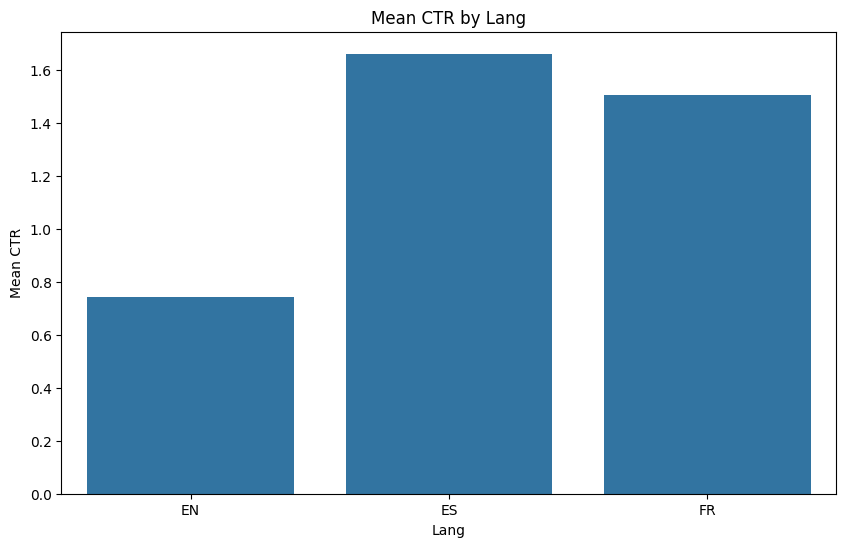

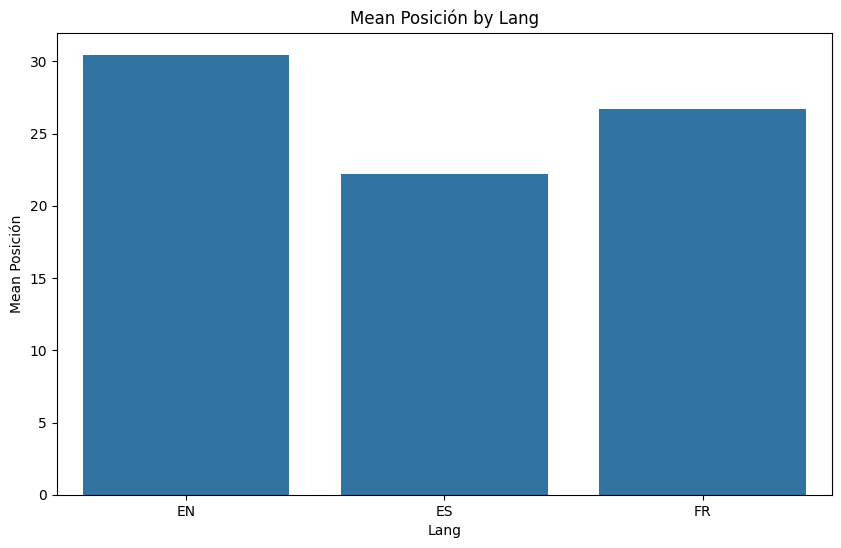

In [10]:
df_pages['CTR'] = df_pages['CTR'].str.replace('%', '').astype(float)
for column in columns_to_plot:
    mean_values = df_pages.groupby('Lang')[column].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    
    # Plot bar plot for mean values
    sns.barplot(x='Lang', y=column, data=mean_values)
    
    # Set title and labels
    plt.title(f'Mean {column} by Lang')
    plt.xlabel('Lang')
    plt.ylabel(f'Mean {column}')
    
    # Show plot
    plt.show()

#### Spanish is the language with the best performance, natural to the company target.
As we see in the plots, Spanish is the best performing language. Due to the target of the company, these are really good news.

##### Clics
The Spanish pages have a mean value of 9 clicks and it is the best performing language. It is followed by both English and French (~2.5 clicks).

##### Impressions
The Spanish pages have a mean value of 380 impressions and it is the best performing language. It is followed by both English (290) and French (150).

##### CTR
The Spanish pages (1.7) and the French pages (1.5) have a way larger CTR than the English pages (0.75).

##### Position
The Spanish pages have a mean position of 22 and it is the best performing language. It is followed by French (27) and English (30).

The analysis reveals that Spanish outperforms both English and French across key metrics, aligning with the company's target audience. Spanish pages exhibit significantly higher click-through rates (CTRs) and impressions, with a mean position advantage. This underscores the importance of prioritizing Spanish content to effectively engage the company's target demographic.

French emerges as the second best performing languagy due to its comparatively higher click-through rates (CTRs), despite trailing behind Spanish across other metrics such as impressions and mean position As seen in the last part of the study (world map plot), France is the second country with more clicks and impressions.

As the company sells overhead cranes and maintenance, the target are industrial companies close to Barcelona. For that reason this is also a result of a good strategy and good job done by the SEO manager..